In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle - 2.csv")
data

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,SLEEP_HOURS,PERSONAL_AWARDS,TIME_FOR_PASSION,AGE,WORK_LIFE_BALANCE_SCORE
0,3,2,5,0,5,7,4,0,3,609.5
1,2,4,3,8,10,8,3,2,3,655.6
2,2,3,4,4,10,8,4,8,3,631.6
3,3,10,3,10,7,5,5,2,4,622.7
4,5,3,3,10,4,7,8,1,4,663.9
...,...,...,...,...,...,...,...,...,...,...
15967,3,0,4,0,10,7,5,2,4,644.5
15968,3,6,8,7,4,6,10,5,2,714.9
15969,4,0,10,10,8,7,10,1,2,716.6
15970,1,10,8,2,7,8,1,6,2,682.0


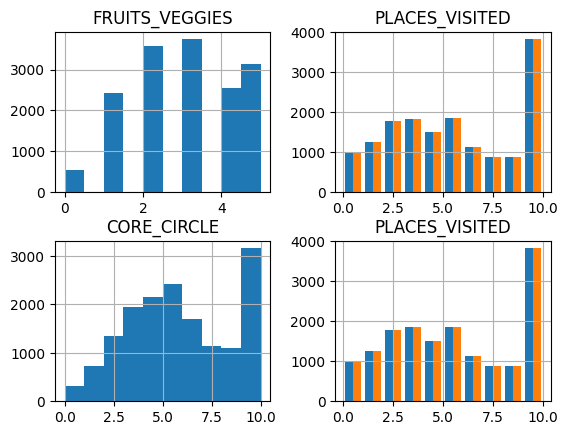

In [28]:
data.hist(column=['FRUITS_VEGGIES', 'PLACES_VISITED','CORE_CIRCLE', 'PLACES_VISITED'])
plt.show()

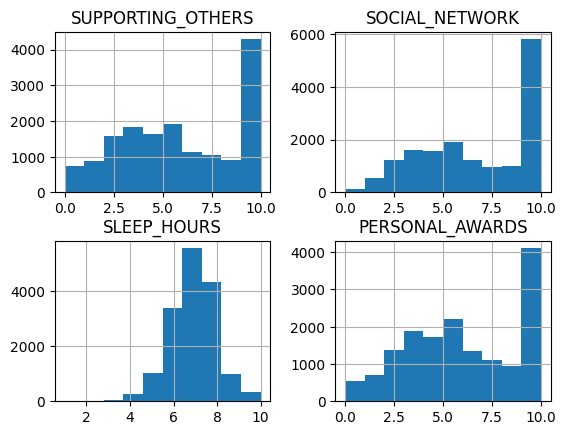

In [29]:
data.hist(column=['SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'SLEEP_HOURS', 'PERSONAL_AWARDS'])
plt.show()

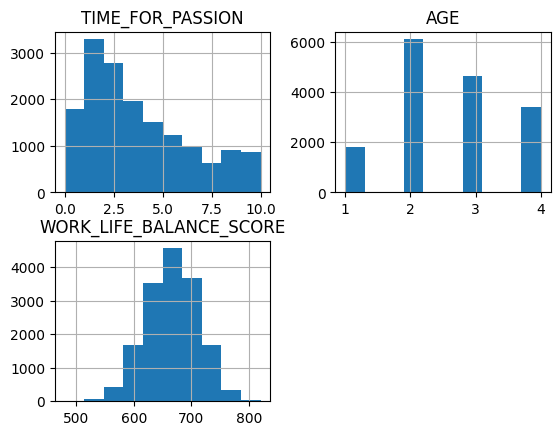

In [30]:
data.hist(column=['TIME_FOR_PASSION', 'AGE','WORK_LIFE_BALANCE_SCORE'])
plt.show()

In [31]:
X = data[['FRUITS_VEGGIES', 'PLACES_VISITED','CORE_CIRCLE', 'PLACES_VISITED', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'SLEEP_HOURS', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'AGE']] # Input variables
Y = data['WORK_LIFE_BALANCE_SCORE'] # Target variable


In [32]:
import statsmodels.api as sm
import pandas as pd
X = sm.add_constant(X)
relation = sm.OLS(Y, X).fit()
# Print the summary of the model
print(relation.summary())

                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.741
Model:                                 OLS   Adj. R-squared:                  0.741
Method:                      Least Squares   F-statistic:                     5070.
Date:                     Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                             01:01:17   Log-Likelihood:                -72686.
No. Observations:                    15972   AIC:                         1.454e+05
Df Residuals:                        15962   BIC:                         1.455e+05
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [33]:
X_no_intercept = data[['FRUITS_VEGGIES', 'PLACES_VISITED','CORE_CIRCLE','PLACES_VISITED', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'SLEEP_HOURS', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'AGE']]
relation_no_intercept = sm.OLS(Y, X_no_intercept).fit()

# Print the summary of the model without intercept
print(relation_no_intercept.summary())

                                   OLS Regression Results                                   
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared (uncentered):                   0.987
Model:                                 OLS   Adj. R-squared (uncentered):              0.987
Method:                      Least Squares   F-statistic:                          1.384e+05
Date:                     Mon, 17 Apr 2023   Prob (F-statistic):                        0.00
Time:                             01:01:25   Log-Likelihood:                         -91661.
No. Observations:                    15972   AIC:                                  1.833e+05
Df Residuals:                        15963   BIC:                                  1.834e+05
Df Model:                                9                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

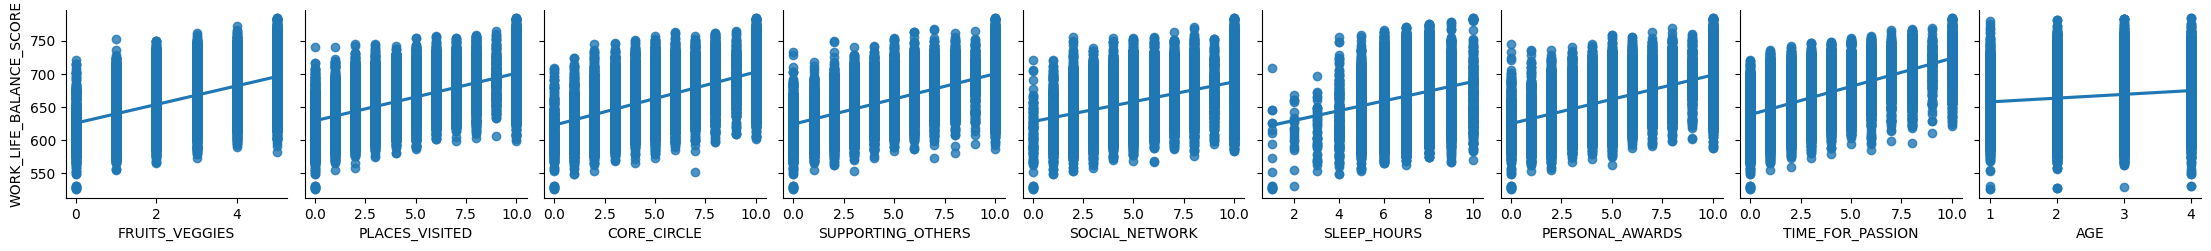

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already fitted the linear regression model and stored it in 'relation' variable
# Get the predicted values from the fitted model
predicted_values = relation.predict()

# Create a DataFrame with the predictor variables and the predicted values
df_plot = data[['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
              'SLEEP_HOURS', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'AGE']]
df_plot['WORK_LIFE_BALANCE_SCORE'] = predicted_values

# Create a scatter matrix plot with regression line
sns.pairplot(df_plot, x_vars=['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
                              'SLEEP_HOURS', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'AGE'],
             y_vars='WORK_LIFE_BALANCE_SCORE', kind='reg')

# Show the plot
plt.show()
